In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")

# I wanted to find out who directed each profitable movie.

First, I took the IMBD Title Principal Data and dropped the unecessary values.

In [2]:
title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [3]:
title_pricipals_1 = title_principals.drop('job', axis=1)
title_pricipals_1.head()

,tconst,ordering,nconst,category,characters
0,tt0111414,1,nm0246005,actor,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]"


In [4]:
main_pricipals = title_pricipals_1.drop('characters', axis=1)
main_pricipals.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


I did then the same with the IMBD Basics Title data

In [5]:
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_basics_1 = title_basics.drop('original_title', axis=1)
title_basics_1.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
title_basics_2 = title_basics_1.drop('start_year', axis=1)
title_basics_2.head()

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [8]:
main_titles = title_basics_2.drop('runtime_minutes', axis=1)
main_titles.head()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


I then merged the two dataframes 

In [9]:
director = main_titles.merge(main_pricipals, on="tconst", how='inner')
director.head()

,tconst,primary_title,genres,ordering,nconst,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",10,nm0006210,composer
1,tt0063540,Sunghursh,"Action,Crime,Drama",1,nm0474801,actor
2,tt0063540,Sunghursh,"Action,Crime,Drama",2,nm0904537,actress
3,tt0063540,Sunghursh,"Action,Crime,Drama",3,nm0756379,actor
4,tt0063540,Sunghursh,"Action,Crime,Drama",4,nm0474876,actor


After the merge, I then took out all rows in the category column that is not director.

In [10]:
categories = director[director['category'] == 'director']
# director.drop(categories, inplace=False)
categories.head()

,tconst,primary_title,genres,ordering,nconst,category
5,tt0063540,Sunghursh,"Action,Crime,Drama",5,nm0712540,director
14,tt0066787,One Day Before the Rainy Season,"Biography,Drama",5,nm0002411,director
22,tt0069049,The Other Side of the Wind,Drama,5,nm0000080,director
32,tt0069204,Sabse Bada Sukh,"Comedy,Drama",5,nm0611531,director
42,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",5,nm0749914,director


I then split the lists in the genres column using the lambda function

In [11]:
categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
categories["genres"].head()

<ipython-input-11-6f53b0115607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)


5       [Action, Crime, Drama]
14          [Biography, Drama]
22                     [Drama]
32             [Comedy, Drama]
42    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

Next, I used .explode in order to make a row for in genre of the specific movie

In [12]:
categories_1 = (categories.explode('genres'))
categories_1.head()

,tconst,primary_title,genres,ordering,nconst,category
5,tt0063540,Sunghursh,Action,5,nm0712540,director
5,tt0063540,Sunghursh,Crime,5,nm0712540,director
5,tt0063540,Sunghursh,Drama,5,nm0712540,director
14,tt0066787,One Day Before the Rainy Season,Biography,5,nm0002411,director
14,tt0066787,One Day Before the Rainy Season,Drama,5,nm0002411,director


I then dropped all values in the genre column that were not adventure

In [13]:
genres = categories_1[categories_1['genres'] == 'Adventure']
# director.drop(genres, inplace=False)
genres.head()

,tconst,primary_title,genres,ordering,nconst,category
255,tt0293429,Mortal Kombat,Adventure,1,nm2585406,director
282,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,5,nm1004541,director
283,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,6,nm0820800,director
342,tt0329539,Rice Girl,Adventure,5,nm0278780,director
368,tt0331314,Bunyan and Babe,Adventure,5,nm8625898,director


Next, I opened the IMBD Name Basics Data

In [14]:
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


I then cleaned the dataframe

In [15]:
name_basics_1 = name_basics.drop('birth_year', axis=1)
name_basics_1.head()

,nconst,primary_name,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [16]:
name_basics_2 = name_basics_1.drop('death_year', axis=1)
name_basics_2.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [17]:
name_basics_3 = name_basics_2.drop('known_for_titles', axis=1)
name_basics_3.head()

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"


Once again, I used the Lambda function to seperate the lists in the primary profession column

In [18]:
name_basics_3["primary_profession"] = name_basics_3["primary_profession"].apply(lambda x: x.split(",") if type(x) == str else x)
name_basics_3["primary_profession"].head()

0        [miscellaneous, production_manager, producer]
1       [composer, music_department, sound_department]
2                       [miscellaneous, actor, writer]
3    [camera_department, cinematographer, art_depar...
4    [production_designer, art_department, set_deco...
Name: primary_profession, dtype: object

I then used .explode in order to make a row for in genre of the specific movie

In [19]:
name_basics_4 = (name_basics_3.explode('primary_profession'))
name_basics_4.head()

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,miscellaneous
0,nm0061671,Mary Ellen Bauder,production_manager
0,nm0061671,Mary Ellen Bauder,producer
1,nm0061865,Joseph Bauer,composer
1,nm0061865,Joseph Bauer,music_department


I then dropped all the values in the primary_profession that were not director

In [20]:
final_name = name_basics_4[name_basics_4['primary_profession'] == 'director']
# director.drop(primary_profession, inplace=False)
final_name.head()

,nconst,primary_name,primary_profession
5,nm0062879,Ruel S. Bayani,director
10,nm0064023,Bryan Beasley,director
15,nm0066163,Arnaud Bedouët,director
16,nm0066268,Steve Mitchell Beebe,director
21,nm0068170,Dylan Bell,director


I then merged the Name Basics Dataframe with the datafram that was already merged

In [21]:
director_merge = genres.merge(final_name, on="nconst", how='inner')
director_merge.head()

,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,tt0293429,Mortal Kombat,Adventure,1,nm2585406,director,Simon McQuoid,director
1,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,6,nm0820800,director,Daniel St. Pierre,director
2,tt0884726,Legends of Oz: Dorothy's Return,Adventure,6,nm0820800,director,Daniel St. Pierre,director
3,tt0329539,Rice Girl,Adventure,5,nm0278780,director,Michael Fischa,director
4,tt0331314,Bunyan and Babe,Adventure,5,nm8625898,director,Louis Ross,director


I then found the five directors that have directed the most adventure movies

In [22]:
top_five = director_merge.primary_name.value_counts().head()
top_five

Kôbun Shizuno      9
Kunihiko Yuyama    8
David Yates        8
Melanie Simka      6
Hark Tsui          6
Name: primary_name, dtype: int64

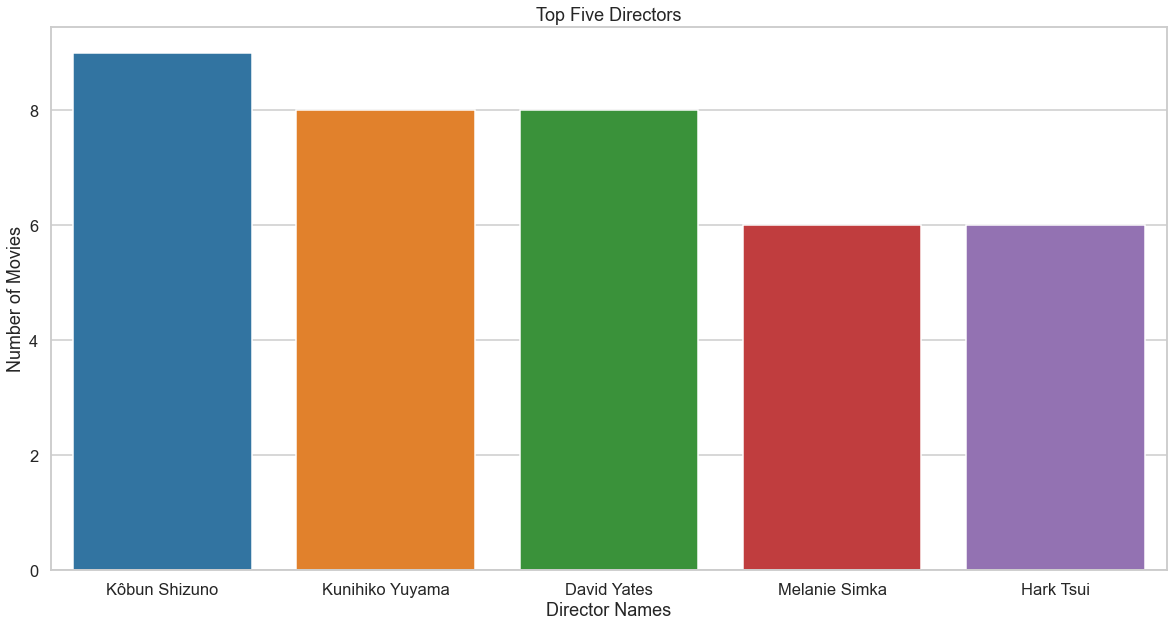

In [23]:
fig, ax = plt.subplots(figsize = (20,10))
top_five_graph = sns.barplot(x=top_five.index, y=top_five.values)
top_five_graph.set(title="Top Five Directors", xlabel="Director Names", ylabel="Number of Movies");

I then wanted to find out which director has made the top grossing adventure movie worldwide. 
I started by taking Jerry's data that he compiled and cleaned

In [24]:
budget_main = pd.read_csv("data/main_data_compilation.csv")

In [25]:
budget_main.drop(columns='Unnamed: 0', inplace=True)
budget_main

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns
0,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813
1,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Adventure,165000000,494870992,329870992,2010-03-26,299.921813
2,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Animation,165000000,494870992,329870992,2010-03-26,299.921813
3,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111
4,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Adventure,170000000,621156389,451156389,2010-05-07,365.386111
...,...,...,...,...,...,...,...,...,...,...,...,...
7535,0.600,The Box,6.0,1,6.0,100.0,Drama,25000000,34356760,9356760,2018-03-04,137.427040
7536,0.600,The Box,6.0,1,6.0,100.0,War,25000000,34356760,9356760,2018-03-04,137.427040
7537,0.600,The Box,6.0,1,6.0,56.0,Thriller,25000000,34356760,9356760,2018-03-04,137.427040
7538,0.719,Enough,8.7,3,26.1,96.0,Drama,38000000,50970660,12970660,2018-03-22,134.133316


Josh then cleaned and did some more merging with Jerry's dataframe

In [26]:
budget_main["title"] = budget_main["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
clean_budget_main = budget_main.drop_duplicates("title")

In [27]:
director_merge['title']=director_merge['primary_title']

In [28]:
director_merge.drop(columns=["primary_title","tconst","nconst"])

,genres,ordering,category,primary_name,primary_profession,title
0,Adventure,1,director,Simon McQuoid,director,Mortal Kombat
1,Adventure,6,director,Daniel St. Pierre,director,Quantum Quest: A Cassini Space Odyssey
2,Adventure,6,director,Daniel St. Pierre,director,Legends of Oz: Dorothy's Return
3,Adventure,5,director,Michael Fischa,director,Rice Girl
4,Adventure,5,director,Louis Ross,director,Bunyan and Babe
...,...,...,...,...,...,...
5914,Adventure,5,director,Dong-Seok Noh,director,Pokemon XY
5915,Adventure,5,director,Robert Fernandez,director,The Pilgrim's Progress
5916,Adventure,4,director,Li Yadong,director,River Pirates
5917,Adventure,1,director,Aleks Alifirenko Jr.,director,The Robinsons


In [29]:
director_merge["title"] = director_merge["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
clean_director_merge = director_merge.drop_duplicates("title")

In [30]:
workable_df = clean_budget_main.merge(clean_director_merge, on=["title"], how="inner").copy()

In [31]:
workable_df

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,28.734,how_to_train_your_dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,27.920,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,26.691,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,22.020,alice_in_wonderland,6.6,8713,57505.8,108.0,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,21.511,tangled,7.5,6407,48052.5,100.0,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,12.987,sherlock_gnomes,5.4,343,1852.2,86.0,Adventure,59000000,87527651,28527651,2018-03-23,148.351951,tt2296777,Sherlock Gnomes,Adventure,5,nm0828970,director,John Stevenson,director
323,12.005,paul__apostle_of_christ,7.1,98,695.8,108.0,Adventure,5000000,25529498,20529498,2018-03-28,510.589960,tt7388562,"Paul, Apostle of Christ",Adventure,5,nm1358366,director,Andrew Hyatt,director
324,6.868,dragon_ball_super__broly,7.4,721,5335.4,100.0,Action,8500000,122747755,114247755,2019-01-16,1444.091235,tt7961060,Dragon Ball Super: Broly,Adventure,5,nm0619110,director,Tatsuya Nagamine,director
325,6.107,sgt__stubby__an_american_hero,6.4,9,57.6,84.0,Adventure,25000000,3645957,-21354043,2018-04-13,14.583828,tt5314190,Sgt. Stubby: An American Hero,Adventure,5,nm4175844,director,Richard Lanni,director


Once the dataframe was turned back over to me I then dropped many of the columns that I did not need

In [32]:
workable_1 = workable_df.drop('popularity', axis=1)
workable_1.head()

,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,6.6,8713,57505.8,108.0,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,7.5,6407,48052.5,100.0,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [33]:
workable_2 = workable_1.drop('vote_average', axis=1)
workable_2.head()

,title,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,8713,57505.8,108.0,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,6407,48052.5,100.0,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [34]:
workable_3 = workable_2.drop('vote_count', axis=1)
workable_3.head()

,title,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,57505.8,108.0,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,48052.5,100.0,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [35]:
workable_4 = workable_3.drop('vote_total', axis=1)
workable_4.head()

,title,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,108.0,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,100.0,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [36]:
workable_5 = workable_4.drop('runtime_minutes', axis=1)
workable_5.head()

,title,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,165000000,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,160000000,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,200000000,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,260000000,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [37]:
workable_6 = workable_5.drop('production_budget', axis=1)
workable_6.head()

,title,genre,worldwide_gross,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,494870992,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,835524642,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,223050874,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,1025491110,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,586477240,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [38]:
workable_7 = workable_6.drop('worldwide_gross', axis=1)
workable_7.head()

,title,genre,worldwide_profit,release_date,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,329870992,2010-03-26,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,675524642,2010-07-16,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,128050874,2010-02-11,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,825491110,2010-03-05,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,326477240,2010-11-24,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [39]:
workable_8 = workable_7.drop('release_date', axis=1)
workable_8.head()

,title,genre,worldwide_profit,percent_returns,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,329870992,299.921813,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,675524642,522.202901,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,128050874,234.790394,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,825491110,512.745555,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,326477240,225.568169,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [40]:
workable_9 = workable_8.drop('percent_returns', axis=1)
workable_9.head()

,title,genre,worldwide_profit,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,329870992,tt0892769,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,675524642,tt1375666,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,128050874,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,825491110,tt1014759,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,326477240,tt0398286,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [41]:
workable_10 = workable_9.drop('tconst', axis=1)
workable_10.head()

,title,genre,worldwide_profit,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,how_to_train_your_dragon,Action,329870992,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,inception,Action,675524642,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,alice_in_wonderland,Adventure,825491110,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,tangled,Adventure,326477240,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [42]:
workable_11 = workable_10.drop('title', axis=1)
workable_11.head()

,genre,worldwide_profit,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,Action,329870992,How to Train Your Dragon,Adventure,5,nm0213450,director,Dean DeBlois,director
1,Action,675524642,Inception,Adventure,5,nm0634240,director,Christopher Nolan,director
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,Adventure,5,nm0001060,director,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,Adventure,5,nm0000318,director,Tim Burton,director
4,Adventure,326477240,Tangled,Adventure,5,nm1977355,director,Nathan Greno,director


In [43]:
workable_12 = workable_11.drop('genres', axis=1)
workable_12.head()

,genre,worldwide_profit,primary_title,ordering,nconst,category,primary_name,primary_profession
0,Action,329870992,How to Train Your Dragon,5,nm0213450,director,Dean DeBlois,director
1,Action,675524642,Inception,5,nm0634240,director,Christopher Nolan,director
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,5,nm0001060,director,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,5,nm0000318,director,Tim Burton,director
4,Adventure,326477240,Tangled,5,nm1977355,director,Nathan Greno,director


In [44]:
workable_13 = workable_12.drop('ordering', axis=1)
workable_13.head()

,genre,worldwide_profit,primary_title,nconst,category,primary_name,primary_profession
0,Action,329870992,How to Train Your Dragon,nm0213450,director,Dean DeBlois,director
1,Action,675524642,Inception,nm0634240,director,Christopher Nolan,director
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,nm0001060,director,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,nm0000318,director,Tim Burton,director
4,Adventure,326477240,Tangled,nm1977355,director,Nathan Greno,director


In [45]:
workable_14 = workable_13.drop('nconst', axis=1)
workable_14.head()

,genre,worldwide_profit,primary_title,category,primary_name,primary_profession
0,Action,329870992,How to Train Your Dragon,director,Dean DeBlois,director
1,Action,675524642,Inception,director,Christopher Nolan,director
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,director,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,director,Tim Burton,director
4,Adventure,326477240,Tangled,director,Nathan Greno,director


In [46]:
workable_15 = workable_14.drop('category', axis=1)
workable_15.head()

,genre,worldwide_profit,primary_title,primary_name,primary_profession
0,Action,329870992,How to Train Your Dragon,Dean DeBlois,director
1,Action,675524642,Inception,Christopher Nolan,director
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,Tim Burton,director
4,Adventure,326477240,Tangled,Nathan Greno,director


I then dropped all the values in the genre column that was not adventure

In [47]:
workable_final = workable_15[workable_df['genre'] == 'Adventure']
workable_final.head()

,genre,worldwide_profit,primary_title,primary_name,primary_profession
2,Adventure,128050874,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,director
3,Adventure,825491110,Alice in Wonderland,Tim Burton,director
4,Adventure,326477240,Tangled,Nathan Greno,director
5,Adventure,638102828,The Twilight Saga: Eclipse,David Slade,director
8,Adventure,263186950,The Chronicles of Narnia: The Voyage of the Da...,Michael Apted,director


I then sorted the data to find the highest grosing adventure movie

In [48]:
money_five = workable_final.sort_values('worldwide_profit', ascending=False).head()
money_five

,genre,worldwide_profit,primary_title,primary_name,primary_profession
24,Adventure,1122469910,Frozen,Adam Green,director
211,Adventure,1086336173,Minions,Kyle Balda,director
282,Adventure,959727750,Despicable Me 3,Kyle Balda,director
115,Adventure,899216835,Despicable Me 2,Chris Renaud,director
226,Adventure,869429616,Zootopia,Byron Howard,director


In [1]:
fig, ax = plt.subplots(figsize = (20,10))
money_graph = sns.barplot(x=money_five.primary_name, y=money_five.worldwide_profit)
money_graph.set(title="Top Four Directors with the Highest Grossing Adventure Movie", xlabel="Director", ylabel="Worlwide Profit in Billions");
# plt.savefig('Top Four Directors with Highest Grossing Adventure Movie.png', dpi=300)

NameError: name 'plt' is not defined